# Problem Statement

#### Background: 
    
Netflix, a leading streaming platform, invests heavily in producing original content to attract and retain subscribers. To maintain its competitive edge, Netflix needs to optimize its content strategy by producing films that resonate with its audience and consistently receive high ratings on platforms like IMDb.

https://economictimes.indiatimes.com/news/international/us/55-percent-of-netflix-us-comprises-netflix-originals-currently-streaming-over-6600-titles/articleshow/101734313.cms?from=mdr

https://tbivision.com/2023/03/13/tbi-tech-analysis-the-where-why-of-netflixs-original-content-spend/#close-modal
https://tbivision.com/files/2023/03/Tech-graph-03.png


#### Problem 

The task at hand involves the examination of data related to Netflix Originals, encompassing various attributes of films, such as their genre, premiere date, runtime, IMDb scores, and language.

Within this notebook, we will perform Exploratory Data Analysis (EDA) journey using the dataset of Netflix original films. The goal is to create an EDA that is beginner-friendly and provides comprehensive explanations for each step, catering to individuals new to data analysis.

The dataset in this study consists of the top 584 Netflix original films spanning different genres. Each film is characterized by attributes like language, release date, runtime, and IMDb score. This dataset was sourced from https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores, which was originally scraped from the following source: https://en.wikipedia.org/wiki/Lists_of_Netflix_original_films



### More on EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process, and it plays a significant role in understanding and gaining insights from a dataset like Netflix Originals data. Here's how EDA can help in this case:

Data Understanding: EDA helps you familiarize yourself with the dataset's structure, contents, and characteristics. It provides an overview of what the data contains and how it's organized.

Quality Check: EDA allows you to identify data quality issues, such as missing values, outliers, and inconsistencies. Cleaning and preprocessing the data is an essential step in any data analysis, and EDA helps pinpoint areas that require attention.

Descriptive Statistics: EDA provides descriptive statistics like mean, median, standard deviation, and percentiles for numerical attributes. This helps in summarizing the central tendency and spread of data.

Visual Insights: Visualizations generated during EDA, such as histograms, box plots, and scatter plots, allow you to visually explore the distribution, relationships, and patterns within the data. For example, you can visualize the distribution of IMDb scores, analyze runtime trends, and understand genre preferences.

Patterns and Trends: EDA helps uncover patterns and trends in the data. For instance, you can identify whether certain genres are more popular, whether IMDb scores have changed over time, or if there are seasonal release patterns.

Correlations: EDA enables the examination of correlations between variables. You can assess how IMDb scores relate to runtime, whether certain genres tend to have higher scores, or if there's a correlation between language and IMDb ratings.

Business Insights: EDA provides valuable insights that can inform business decisions. For Netflix, this could include optimizing release schedules, understanding audience preferences, and identifying factors that contribute to higher IMDb ratings.

Hypothesis Generation: EDA can lead to the generation of hypotheses that can be tested further. For example, you might hypothesize that shorter runtimes correlate with higher IMDb scores and use statistical tests to validate this.

Data Visualization: EDA often involves creating informative visualizations that can be used to communicate findings to stakeholders, team members, or the broader audience effectively.

In summary, EDA is a critical phase that helps transform raw data into meaningful insights. It provides the foundation for more advanced analyses, model building, and data-driven decision-making. In the context of Netflix Originals data, EDA is essential for understanding viewer preferences, optimizing content strategies, and making informed business decisions.

Release Strategy: EDA might reveal trends in the release of Netflix Originals. For instance, it could show that Fridays and Wednesdays are popular release days. This information can help Netflix plan future release schedules.

Genre Preferences: Analysis of genre distribution can highlight which genres are more prevalent among Netflix Originals. Insights into genre popularity can guide content creation decisions.

IMDb Ratings: EDA might show the distribution of IMDb scores, indicating whether Netflix Originals tend to have high or low ratings. Understanding IMDb ratings can inform content quality and viewer satisfaction.

Runtime Distribution: Examining the distribution of runtime can provide insights into viewer preferences. It can help determine whether shorter or longer content is more popular.

Language Diversity: EDA can reveal the diversity of languages used in Netflix Originals. It's important for Netflix to cater to a global audience, so language insights are valuable.

Temporal Trends: Analysis of release dates over time can identify temporal trends. For example, it might show whether there's an increasing trend in the number of releases or whether specific months are more popular for premieres.

Viewer Engagement: Patterns in viewer engagement, such as when viewers tend to watch Netflix Originals, can be valuable for scheduling content releases and promotions.

Correlations: EDA can identify correlations between attributes. For example, it might uncover whether there's a correlation between IMDb scores and runtime.

Recommendations: EDA can lead to recommendations for Netflix, such as optimizing the release schedule, investing in popular genres, or exploring collaborations in specific regions.

It's important to note that EDA is just the first step in the data analysis process. The conclusions drawn from EDA can inform further analyses, hypothesis testing, and data-driven decision-making. The specific insights and conclusions will depend on the depth and scope of the EDA performed on the dataset.






# Import Libraries

To perform above tasks , we will be making using of pandas for data manipulation .For data visualization, we will make use of  matplotlib and seaborn

In [218]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [219]:
# Download Data from kaggle

import os
import zipfile
os.environ['KAGGLE_USERNAME'] = "anuradhalearn"
os.environ['KAGGLE_KEY'] = "68ba9b50059f5794523a86a757a5069d"
!kaggle datasets download -d luiscorter/netflix-original-films-imdb-scores

##Code to extract from the zip file ##
cwd = os.getcwd()
print(cwd)
zip_file = os.path.join(cwd,"netflix-original-films-imdb-scores.zip")
print(zip_file)
destination_folder = cwd

with zipfile.ZipFile(zip_file, "r") as zip_ref:
    csv_file_names = [file for file in zip_ref.namelist() if file.endswith(".csv")]
    if len(csv_file_names) > 0:
        csv_file_names = csv_file_names[0]
        zip_ref.extract(csv_file_names)
        print(excel_file_name)


netflix-original-films-imdb-scores.zip: Skipping, found more recently modified local copy (use --force to force download)
C:\Users\agaan
C:\Users\agaan\netflix-original-films-imdb-scores.zip
NetflixOriginals.csv


# Load Data

In [220]:
# Load the dataset
df = pd.read_csv('NetflixOriginals.csv',encoding='latin-1')

In [221]:
# Display the first few rows of the dataset to get an overview
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [222]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
None


In [223]:
#check for null values
df.isnull().any()

Title         False
Genre         False
Premiere      False
Runtime       False
IMDB Score    False
Language      False
dtype: bool

#### Conclusion

Number of Entries
The dataset contains a total of 584 entries, which means there are data records for 584 Netflix Original Films.

Data Columns
There are six columns in the dataset:

- Title: The title of each Netflix Original Film (categorical).
- Genre: The genre(s) of each film (categorical).
- Premiere: The premiere date of each film (datetime).
- Runtime: The runtime of each film in minutes (numerical).
- IMDB Score: The IMDb score of each film (numerical).
- Language: The language(s) of each film (categorical).
- Data Types: The data types of the columns are appropriate:

Title, Genre, and Language are object data types (categorical).
Premiere is a object data type and needs to be converted to date type data.
Runtime is an integer data type (numerical).
IMDB Score is a float data type (numerical).

Non-Null Counts: There are no missing values (NaN) in any of the columns. All columns have 584 non-null entries, indicating that the dataset is complete in terms of data availability.

Memory Usage: The memory usage of the dataset is approximately 27.5 KB, which is relatively small, suggesting that the dataset is not very large and can be easily handled by most computing environments.



In [224]:
# Check basic statistics of numerical columns
print(df.describe())

          Runtime  IMDB Score
count  584.000000  584.000000
mean    93.577055    6.271747
std     27.761683    0.979256
min      4.000000    2.500000
25%     86.000000    5.700000
50%     97.000000    6.350000
75%    108.000000    7.000000
max    209.000000    9.000000


### Conclusion

Based on the statistics provided for the Runtime and IMDB Score columns in the Netflix Original Films dataset, we can draw the following conclusions:

Runtime:

Variability in Runtime: The film runtimes in the dataset vary widely, with runtimes ranging from a minimum of 4 minutes to a maximum of 209 minutes. This wide range suggests that Netflix offers a diverse selection of films with varying durations.

Typical Runtime: The mean runtime of approximately 93.58 minutes can be considered as the typical duration of Netflix Original Films in the dataset. This indicates that, on average, Netflix's original content is of moderate length.

Distribution of Runtimes: The runtime distribution is somewhat right-skewed, as indicated by the mean being slightly less than the median (97 minutes). This suggests that while there are shorter films, there are also longer films that pull the distribution to the right.

IMDB Score:

Moderate IMDb Scores: The IMDb scores of Netflix Original Films in the dataset have a mean of approximately 6.27. This suggests that, on average, the films have received moderately positive ratings on IMDb.

Variability in Ratings: IMDb scores vary moderately across the dataset, with a standard deviation of approximately 0.98. This indicates that some films have received higher ratings, while others have received lower ratings, contributing to the variability.

Range of IMDb Scores: The IMDb scores in the dataset range from a minimum of 2.5 to a maximum of 9.0, highlighting a wide spectrum of audience preferences and reception.

Distribution of Ratings: The distribution of IMDb scores appears to be relatively symmetrical, as indicated by the mean and median being close in value (6.27 and 6.35, respectively).

In conclusion, Netflix offers a diverse range of original films in terms of runtime, catering to different viewer preferences. The IMDb scores suggest that the majority of these films receive moderately positive ratings, although there is variation in audience reception. Further analysis and exploration of these variables in the context of other attributes, such as genre, language, and premiere date, would be valuable for making data-driven decisions regarding content strategy optimization.






# Data Preprocessing

##### Handling Null Values:

Null values in the dataset should be handled to ensure the data is clean and suitable for analysis.
In this case we see there are no null values , hence this step is omitted.We will be doing these steps in other datsets with missing numerical or categorical values.


##### Categorical Encoding:

Machine learning algorithms generally require numerical inputs, so categorical columns like 'Genre' and 'Language' need to be encoded.
For now we are only taking about visualizations and not doing any ML task hence this step is omitted

##### Date,Month extraction for columns containing string of date
This is performed by converting such columns to date type using pandas to_date function.Further to this we can extract month, year or day from th column and create new column corresponding to each.This helps in further visualization of data based on these attributes.
Here we have 'Premiere' column which we will handling as part of preprocessing and convert from object type to date




In [225]:
df.dtypes

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object

In [226]:
df['Premiere']=pd.to_datetime(df['Premiere'])
df.dtypes

Title                 object
Genre                 object
Premiere      datetime64[ns]
Runtime                int64
IMDB Score           float64
Language              object
dtype: object

In [227]:
# Adding new columns
# Calculate the year of premiere for analysis
df['Premiere_Year'] = df['Premiere'].dt.year
df['Premiere_Month'] = df['Premiere'].dt.month
# Extract the name of the day and create a new column
df['Premiere_Day_Name'] = df['Premiere'].dt.strftime('%A')
# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['Day_of_Week'] = df['Premiere'].dt.dayofweek

# Create a new column to indicate weekday or weekend
df['Weekday_or_Weekend'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df = df.drop('Day_of_Week', axis=1)
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Year,Premiere_Month,Premiere_Day_Name,Weekday_or_Weekend
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8,Monday,Weekday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8,Friday,Weekday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12,Thursday,Weekday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1,Friday,Weekday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10,Friday,Weekday


In [228]:
df.dtypes

Title                         object
Genre                         object
Premiere              datetime64[ns]
Runtime                        int64
IMDB Score                   float64
Language                      object
Premiere_Year                  int64
Premiere_Month                 int64
Premiere_Day_Name             object
Weekday_or_Weekend            object
dtype: object

# EDA

In [229]:
# top level container for all the plot elements
fig=plt.figure(figsize=(8, 3))
# plt.title('Distribution of IMDb Scores with Mean and Median Lines')

# plt.show()

<Figure size 800x300 with 0 Axes>

## Univariate Analysis

#### Purpose: Understand the distribution of IMDb scores for Netflix Original Films.

<Axes: ylabel='Frequency'>

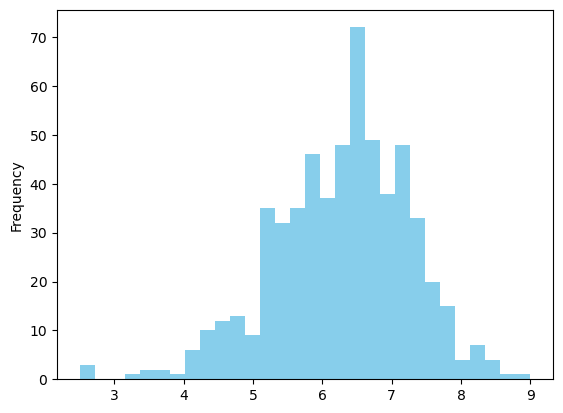

In [230]:
df['IMDB Score'].plot(kind='hist', bins=30, color='skyblue')


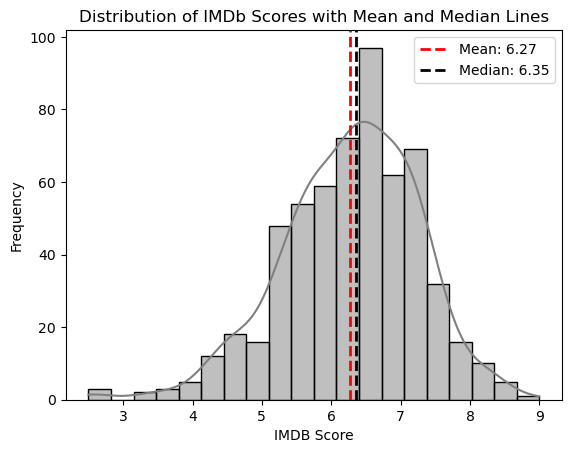

In [231]:
sns.histplot(df['IMDB Score'], bins=20, kde=True, color='gray')

# Calculate the mean and median
mean_score = df['IMDB Score'].mean()
median_score = df['IMDB Score'].median()

# Add mean and median lines
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_score:.2f}')
plt.axvline(median_score, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median_score:.2f}')

# Set plot title and labels
plt.title('Distribution of IMDb Scores with Mean and Median Lines')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [232]:
from scipy.stats import skew
skewness = skew(df['IMDB Score'])
print(skewness)

-0.4900995563413999


### Note on Skewness
A skewness value of approximately -0.49 suggests that the distribution of the IMDb scores is slightly left-skewed.

In a left-skewed distribution:

The tail of the distribution is on the left-hand side.

The majority of the data points are concentrated on the right side of the distribution.

The mean is typically less than the median (the 50th percentile), and the median is often a better measure of central tendency than the mean in such distributions.

In the context of IMDb scores, this skewness indicates that there may be a concentration of movies with relatively high scores, while fewer movies have lower scores, leading to a distribution that tilts slightly to the left. This could suggest that the majority of movies in the dataset have IMDb scores that are above average.

It's important to note that the degree of skewness (-0.49 in this case) is relatively mild, so while there is a slight skew to the left, it may not significantly impact the interpretation of the data.

Text(0, 0.5, 'IMDB Score Distribution')

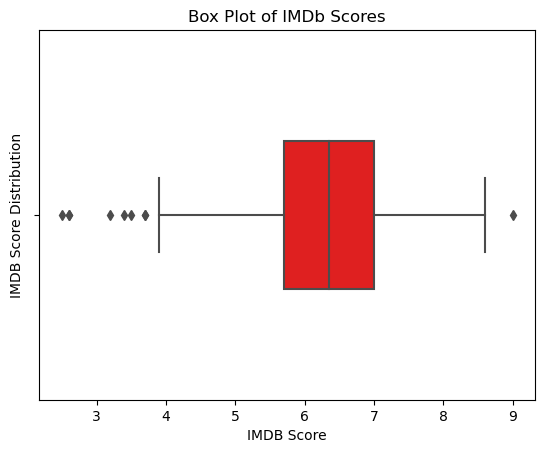

In [233]:
sns.boxplot(x=df['IMDB Score'], color='red', width=0.4)

# Set plot title and labels
plt.title('Box Plot of IMDb Scores')
plt.xlabel('IMDB Score')
plt.ylabel('IMDB Score Distribution')


IMDB Score data is left right skewed with several outliers which pull the mean towards left.Typical IMDB range is bewteen 5.5 to 7
'IMDB Score' data is slightly left-skewed, suggesting that there are more movies with lower IMDb scores.

#### Purpose: Understand the distribution of film runtimes

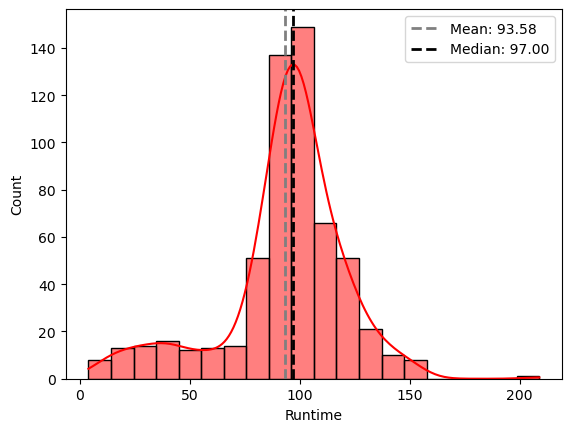

In [234]:
# Calculate the mean and median
mean_score = df['Runtime'].mean()
median_score = df['Runtime'].median()
sns.histplot(df['Runtime'], bins=20, kde=True, color='red')

# Add mean and median lines
plt.axvline(mean_score, color='gray', linestyle='dashed', linewidth=2, label=f'Mean: {mean_score:.2f}')
plt.axvline(median_score, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median_score:.2f}')
plt.legend()
plt.show()


'Runtime' data is slightly left-skewed.There are relatively more movies with shorter runtimes compared to longer ones.


In [235]:
#Calculate Skewness
#Skewness = (3 * (Mean - Median)) / Standard Deviation
from scipy.stats import skew
runtime_skewness = skew(df['Runtime'])
print(f'Skewness for Runtime: {runtime_skewness:.2f}')

Skewness for Runtime: -0.88


In the case of a left-skewed distribution of movie or TV show runtimes:

- There may be a concentration of longer durations (e.g., movies with relatively long runtimes).
- Fewer instances would have shorter runtimes (e.g., shorter episodes or movies).

#### Purpose: Identify the most popular genres among Netflix Original Films.

In [236]:
# Genre Analysis
genre_counts = df['Genre'].value_counts().sort_values(ascending=False).head(10)
'''Note: value_counts method in pandas generates a Series with the unique values as the index and the counts
of each unique value as the corresponding data in the Series.'''
genre_counts

Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Comedy-drama        14
Crime drama         11
Biopic               9
Horror               9
Action               7
Name: Genre, dtype: int64

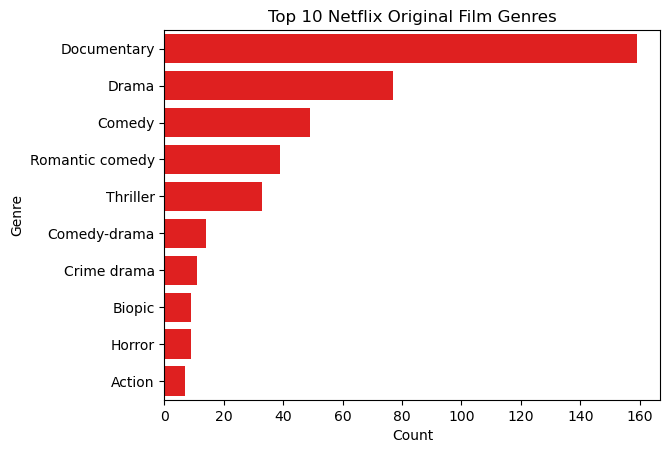

In [237]:
sns.barplot(x=genre_counts.values, y=genre_counts.index, color="red")
plt.title('Top 10 Netflix Original Film Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

#### Purpose: Understand the diversity of languages in Netflix Original Films.

In [238]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Year,Premiere_Month,Premiere_Day_Name,Weekday_or_Weekend
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8,Monday,Weekday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8,Friday,Weekday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12,Thursday,Weekday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1,Friday,Weekday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10,Friday,Weekday


In [239]:
language_counts=df['Language'].value_counts().sort_values(ascending=False).head(10)
language_counts

English       401
Hindi          33
Spanish        31
French         20
Italian        14
Portuguese     12
Indonesian      9
Korean          6
Japanese        6
German          5
Name: Language, dtype: int64

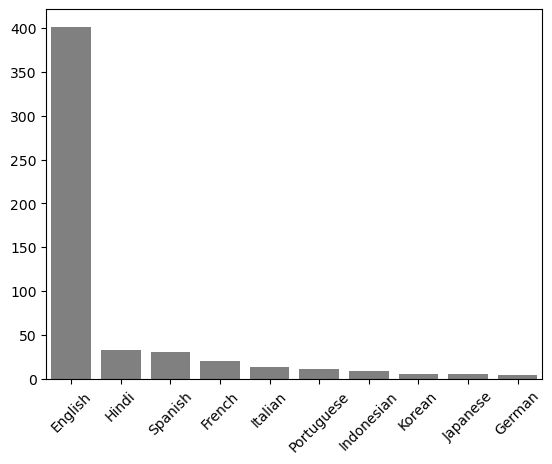

In [240]:
sns.barplot(x=language_counts.index,y=language_counts.values,color='gray')
plt.xticks(rotation=45)
plt.show()

#### Purpose: Analyze the distribution of film releases by month.

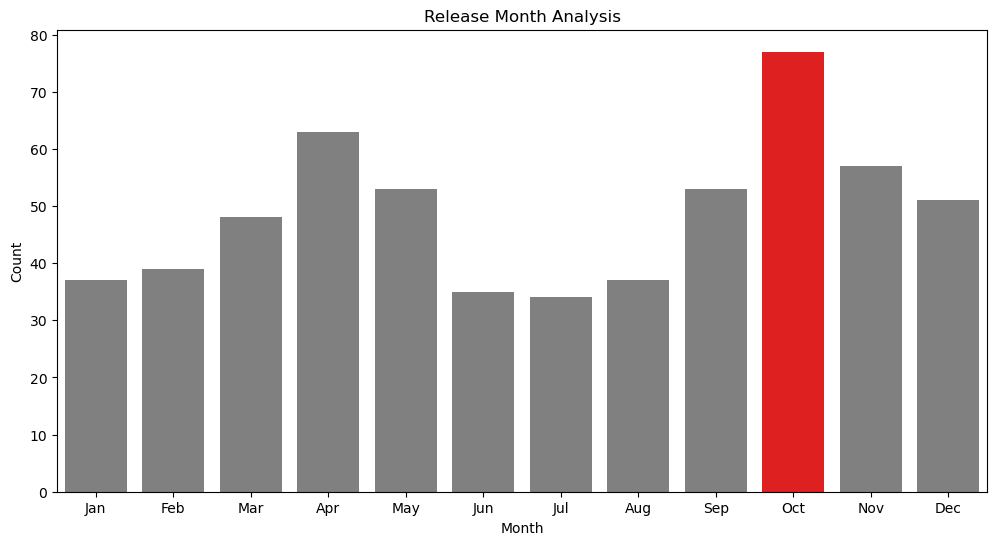

In [241]:

# plt.figure(figsize=(12, 6))

month_counts = df.groupby('Premiere_Month').size().reset_index(name='Count')
month_counts


# Find the month(s) with the highest count
highest_months = month_counts[month_counts['Count'] == month_counts['Count'].max()]['Premiere_Month'].tolist()

# Create a custom color palette
colors = ['red' if month in highest_months else 'gray' for month in month_counts['Premiere_Month']]

# Create the countplot with the custom colors
plt.figure(figsize=(12, 6))
sns.countplot(x='Premiere_Month', data=df, palette=colors)
plt.title('Release Month Analysis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [242]:
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language',
       'Premiere_Year', 'Premiere_Month', 'Premiere_Day_Name',
       'Weekday_or_Weekend'],
      dtype='object')

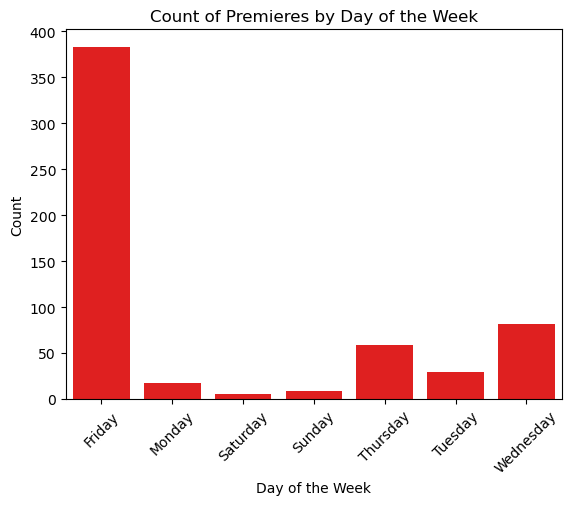

In [257]:
# 1. Count of Premieres by Day of the Week
day_counts = df['Premiere_Day_Name'].value_counts().sort_index()

sns.barplot(x=day_counts.index, y=day_counts.values,color='red')
plt.title('Count of Premieres by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Clearly Friday is the winner followed by wednesday

Read More:
  https://www.whats-on-netflix.com/news/what-days-does-netflix-release-netflix-originals/#:~:text=Netflix%20Originals%20are%20perhaps%20most,the%20reason%20should%20be%20obvious.

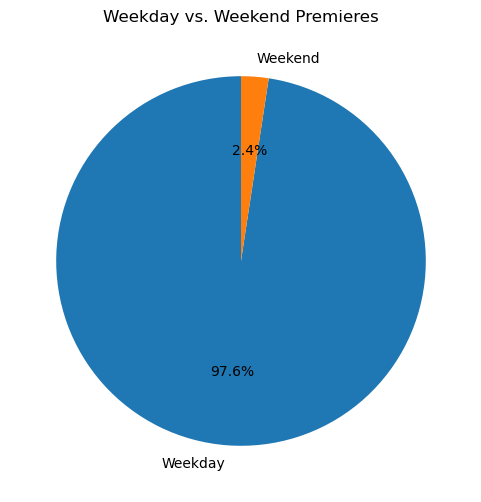

In [256]:
# 4. Weekday vs. Weekend Premieres
weekday_vs_weekend = df['Weekday_or_Weekend'].value_counts(normalize=True)

plt.figure(figsize=(6, 6))
plt.pie(weekday_vs_weekend, labels=weekday_vs_weekend.index, autopct='%1.1f%%', startangle=90)
plt.title('Weekday vs. Weekend Premieres')
plt.show()

Friday is the day with the most premieres for Netflix shows and movies, followed by Wednesday. This release pattern aligns with some of the considerations mentioned earlier.

Friday Premieres:

Friday is often considered a prime day for content releases because it marks the beginning of the weekend, and viewers have more leisure time to watch shows and movies.
It allows viewers to start watching new content on Friday evening and continue throughout the weekend.

Wednesday Premieres:

Wednesday premieres could be a strategic choice to capture midweek viewership.
It breaks away from the traditional Friday release and may help content stand out during the week.
Understanding these release patterns can be valuable for both Netflix and viewers, as it provides insights into when new content is most likely to be available for streaming. It also reflects Netflix's adaptability in scheduling premieres to cater to different viewing habits and preferences.

### Multivariate Analysis

#### Purpose: Track how IMDb scores have changed over the years

In [244]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Year,Premiere_Month,Premiere_Day_Name,Weekday_or_Weekend
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8,Monday,Weekday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8,Friday,Weekday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12,Thursday,Weekday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1,Friday,Weekday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10,Friday,Weekday


In [245]:
grouped_data=df.groupby('Premiere_Year')['IMDB Score']
# View the grouped data
for year, scores in grouped_data:
    print(f'Year: {year}')
    print(scores)
    print()

Year: 2014
304    6.4
Name: IMDB Score, dtype: float64

Year: 2015
49     4.8
107    5.5
228    6.1
465    7.1
519    7.3
531    7.4
550    7.6
553    7.7
580    8.4
Name: IMDB Score, dtype: float64

Year: 2016
14     4.2
31     4.6
57     5.0
93     5.3
127    5.6
155    5.7
166    5.8
174    5.8
182    5.8
205    5.9
232    6.1
281    6.3
294    6.4
351    6.6
385    6.7
387    6.7
390    6.8
414    6.9
468    7.1
480    7.2
483    7.2
497    7.2
501    7.3
514    7.3
515    7.3
518    7.3
541    7.5
557    7.7
566    7.9
571    8.2
Name: IMDB Score, dtype: float64

Year: 2017
19     4.4
44     4.8
47     4.8
60     5.1
65     5.2
      ... 
538    7.5
556    7.7
564    7.9
568    8.1
576    8.3
Name: IMDB Score, Length: 66, dtype: float64

Year: 2018
3      3.2
8      3.9
29     4.6
55     5.0
62     5.1
      ... 
547    7.6
559    7.7
567    8.0
579    8.4
581    8.5
Name: IMDB Score, Length: 99, dtype: float64

Year: 2019
0      2.5
2      2.6
5      3.5
15     4.3
20     4.4
   

In [246]:
yearly_avg_scores=df.groupby('Premiere_Year')['IMDB Score'].mean().reset_index()
print(type(yearly_avg_scores))
yearly_avg_scores

<class 'pandas.core.frame.DataFrame'>


,Premiere_Year,IMDB Score
0,2014,6.400000
1,2015,6.877778
2,2016,6.513333
3,2017,6.422727
4,2018,6.360606
5,2019,6.259200
6,2020,6.195082
7,2021,6.046479


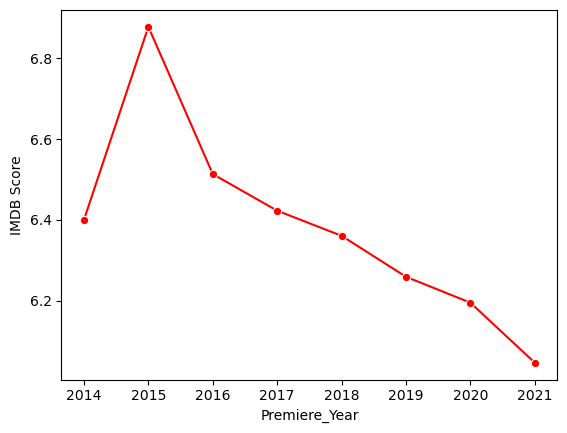

In [247]:
sns.lineplot(x='Premiere_Year', y='IMDB Score', data=yearly_avg_scores, marker='o', color='red')
plt.show()

This shows gradual decrease in IMDB Score of movies except one spike during the year 2015

#### Purpose: Explore if there's any correlation between film runtime and IMDb score

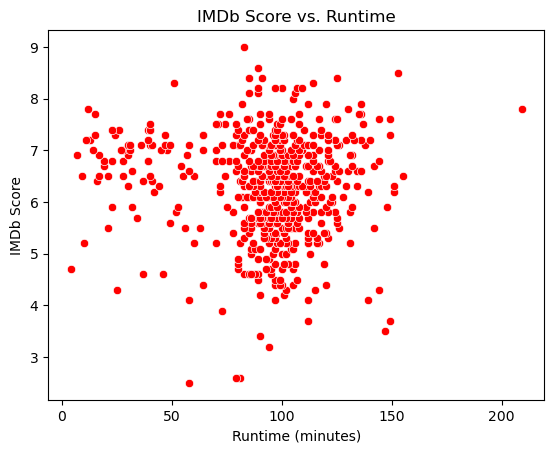

In [248]:
sns.scatterplot(x="Runtime",y='IMDB Score',data=df,color='red')
plt.title('IMDb Score vs. Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.show()

There seems no strong correlation between runtime and imdb score .We can see this through below correlation as well

In [249]:
df[['IMDB Score','Runtime']].corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


### More on Correlation

A correlation coefficient of -0.040896 between runtime and IMDb score indicates a very weak and almost negligible negative linear relationship between these two variables.

Here's what this correlation value suggests:

Weak Relationship: The correlation coefficient, which ranges from -1 to 1, measures the strength and direction of the linear relationship between two variables. In this case, a value close to 0 (like -0.040896) indicates that there is little to no linear relationship between runtime and IMDb score.

Negative Correlation: The negative sign of the correlation coefficient suggests that as one variable (runtime) tends to increase, the other variable (IMDb score) tends to decrease slightly. However, the degree of this decrease is so small that it's unlikely to be practically significant.

Almost No Predictive Power: In practical terms, this correlation value indicates that the runtime of a movie or TV show does not have a meaningful influence on its IMDb score. The IMDb score of a film or show is influenced by a wide range of factors, and runtime alone does not provide a strong basis for predicting the score.

In summary, the correlation value of -0.040896 suggests that there is a very weak and almost non-existent negative linear relationship between the runtime and IMDb score in your dataset.

#### Purpose: Analyze how IMDb scores across different attributes

#### Distribution of imdb score at genere label

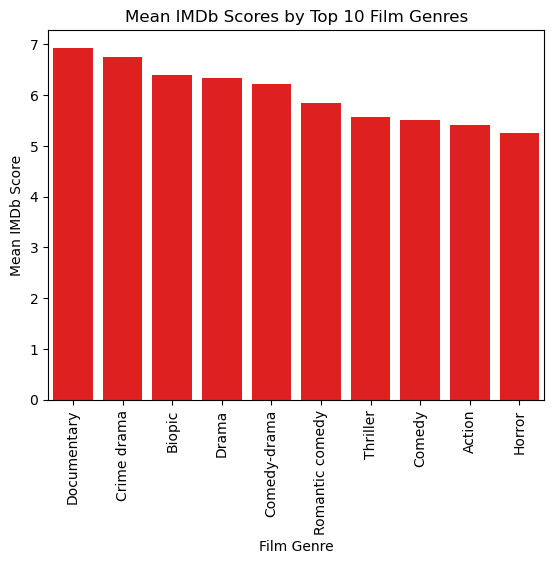

In [250]:
# Determine the top 10 film genres by frequency
top_10_genres = df['Genre'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 genres
df_top_10_genres = df[df['Genre'].isin(top_10_genres)]

# Calculate the mean IMDb score for each genre
genre_means = df_top_10_genres.groupby('Genre')['IMDB Score'].mean().reset_index()

# Sort the genres by mean IMDb score in descending order
genre_means = genre_means.sort_values(by='IMDB Score', ascending=False)


# Create a bar plot of mean IMDb scores for the top 10 film genres

sns.barplot(data=genre_means, x='Genre', y='IMDB Score', color='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and labels
plt.title('Mean IMDb Scores by Top 10 Film Genres')
plt.xlabel('Film Genre')
plt.ylabel('Mean IMDb Score')

# Show the plot
plt.show()



This graph shows imdb score tends to be higher for Documenteries

Below box plot shows IMDB score distribution for different generes

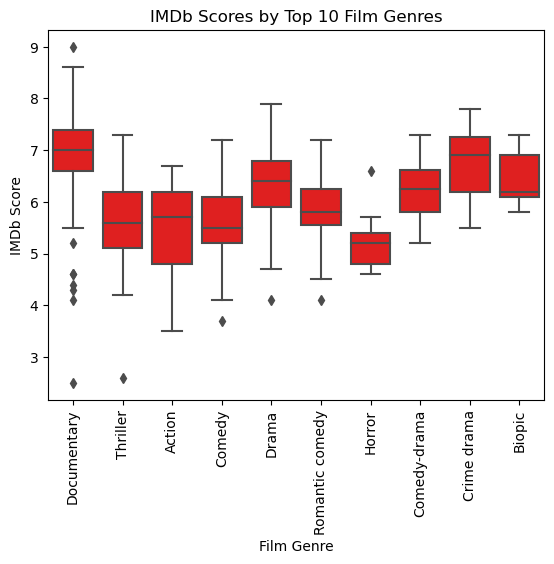

In [251]:

# Create a box plot of IMDb scores for the top 10 film genres
# plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_10_genres, x='Genre', y='IMDB Score', color='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and labels

plt.title('IMDb Scores by Top 10 Film Genres')
plt.xlabel('Film Genre')
plt.ylabel('IMDb Score')

# Show the plot
plt.show()



#### Analysis of IMDB Score with Genere and language Together

In [252]:


# Determine the top 10 film genres and top 10 languages by frequency
top_10_genres = df['Genre'].value_counts().head(10).index
top_10_languages = df['Language'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 genres and top 10 languages
df_top_10_genres_languages = df[df['Genre'].isin(top_10_genres) & df['Language'].isin(top_10_languages)]

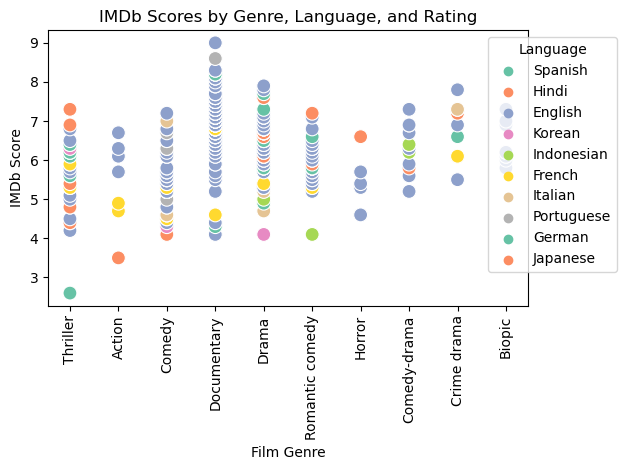

In [253]:
# Create a scatter plot to visualize the relationships
# plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_10_genres_languages,  # The DataFrame containing the data
    x='Genre',                      # The column for the x-axis (genre)
    y='IMDB Score',                 # The column for the y-axis (IMDb Score)
    hue='Language',                 # Hue parameter for coloring points by language
    palette='Set2',                # Color palette to use for different languages
    s=100                           # Size of the data points (markers)
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and labels
plt.title('IMDb Scores by Genre, Language, and Rating')
plt.xlabel('Film Genre')
plt.ylabel('IMDb Score')

# Add a legend for the Language variable
plt.legend(title='Language', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.tight_layout()
plt.show()


#### Alternate and better visualization for above - using Pivot table and Heat Map

In [254]:
# Create a pivot table to prepare the data for the heatmap
pivot_table = df_top_10_genres_languages.pivot_table(
    values='IMDB Score',  # The values to aggregate (IMDb Score in this case)
    index='Genre',        # The index of the pivot table (movie genres)
    columns='Language',   # The columns of the pivot table (languages)
    aggfunc='mean'        # The aggregation function (mean in this case)
)

'''display the structured pivot table with movie genres as rows, languages as columns,
and mean IMDb scores at the intersections. 
This will allow you to see how IMDb scores vary for different movie genres across various languages.'''
print(type(pivot_table))
pivot_table




<class 'pandas.core.frame.DataFrame'>


Language,English,French,German,Hindi,Indonesian,Italian,Japanese,Korean,Portuguese,Spanish
Genre,,,,,,,,,,
Action,6.200000,4.800000,NaN,3.500000,NaN,NaN,NaN,NaN,NaN,NaN
Biopic,6.425000,NaN,NaN,NaN,NaN,6.200,NaN,NaN,NaN,NaN
Comedy,5.563333,4.900000,NaN,5.725000,NaN,5.400,NaN,4.3,5.733333,5.400000
Comedy-drama,6.287500,NaN,NaN,6.350000,6.3,NaN,NaN,NaN,5.600000,NaN
Crime drama,6.720000,6.100000,NaN,7.200000,NaN,7.300,NaN,NaN,NaN,6.600000
Documentary,7.016667,6.333333,NaN,NaN,NaN,NaN,6.7,7.5,7.566667,6.775000
Drama,6.577143,5.900000,5.8,6.276923,5.8,5.675,6.3,5.4,NaN,6.375000
Horror,5.120000,NaN,NaN,6.600000,NaN,NaN,NaN,NaN,NaN,NaN
Romantic comedy,5.907407,5.800000,6.4,6.266667,4.1,NaN,NaN,NaN,5.800000,6.200000


Pandas provides a pivot_table function that lets you create pivot tables from DataFrame objects. Here's how it works in the context of pandas:

Rows (Index): You specify one or more columns from your DataFrame to become the index (rows) of the pivot table. These columns represent the categories or groups by which you want to organize your data.

Columns: You specify one or more columns to become the columns of the pivot table. These columns represent the subcategories, attributes, or characteristics you want to compare against the rows.

Values: You specify the column whose values you want to summarize or aggregate. These values will be aggregated based on the intersections of rows and columns.

Aggregation Function: You can specify an aggregation function (e.g., mean, sum, count, etc.) to apply to the values. This function determines how the values are summarized at each intersection point.

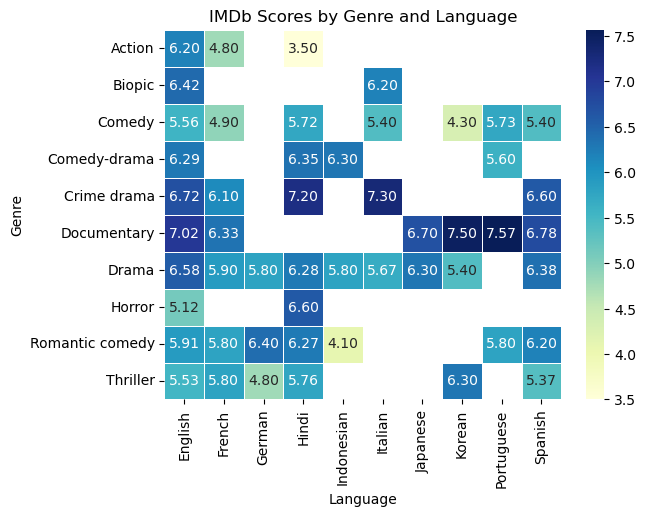

In [255]:
# Create a heatmap
sns.heatmap(
    pivot_table,     # The data to be plotted (a pivot table)
    cmap='YlGnBu',   # The color map to use for coloring the heatmap
    annot=True,      # Whether to annotate the cells with values
    fmt='.2f',       # The format for annotating cell values (2 decimal places)
    linewidths=0.5   # The width of the lines that separate cells
)
# Set plot title and labels
plt.title('IMDb Scores by Genre and Language')
plt.xlabel('Language')
plt.ylabel('Genre')

# Show the plot
plt.show()

### More on Heatmaps
pivot_table: This is the data to be plotted in the heatmap. In your case, it's a pivot table that you've created using the pivot_table function, which contains aggregated values.

cmap: The cmap parameter specifies the color map to be used for coloring the heatmap. In this case, 'YlGnBu' is used, which is a color map that ranges from yellow (Yl) to green (Gn) to blue (Bu). It provides a sequential color palette suitable for visualizing data values.

annot: The annot parameter determines whether to annotate the cells of the heatmap with their actual values. When set to True, the cell values will be displayed on the heatmap.

fmt: The fmt parameter specifies the format to be used for annotating the cell values. In this example, '.2f' is used, which formats the values with two decimal places.

linewidths: The linewidths parameter controls the width of the lines that separate the cells in the heatmap. A value of 0.5 is used, which creates thin lines between cells.

The sns.heatmap function is a powerful tool for visualizing structured data, particularly when you want to represent relationships between two categorical variables and visualize the magnitude of a value associated with each combination of those variables. In this case, it's used to create a heatmap of a pivot table, which allows you to see how values are distributed across categories and subcategories.